## Rendimento Casa/Fuori Casa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text
import matplotlib.patheffects as path_effects
from PIL import Image
import urllib
import os
import matplotlib.font_manager as fm

In [2]:
font_path = "./assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("./assets/stylesheets/soc_base.mplstyle")

In [3]:

df = pd.read_csv('./data/fbref_data.csv', sep=',')
df.set_index('Squad')

,Casa,Fuori
Squad,,
Napoli,39,44
Juventus,42,27
Inter,39,27
Lazio,34,31
Milan,37,24
Roma,32,27
Atalanta,27,31
Fiorentina,30,19
Monza,26,23


In [4]:
def calc_diff(data):
    diffs = pd.Series(index=data.index, name='Diff', dtype=float)
    for x in data.itertuples():
        diffs.loc[x.Index] = (x.Casa-x.Fuori)
    return data.merge(diffs, right_index=True, left_index=True).set_index('Squad')
df_sum = calc_diff(df)
df_sum

,Casa,Fuori,Diff
Squad,,,
Napoli,39,44,-5.0
Juventus,42,27,15.0
Inter,39,27,12.0
Lazio,34,31,3.0
Milan,37,24,13.0
Roma,32,27,5.0
Atalanta,27,31,-4.0
Fiorentina,30,19,11.0
Monza,26,23,3.0


In [5]:
def calc_percent(data):
    df = pd.DataFrame(index=data.index, columns=['Casa', 'Fuori', 'Diff'])
    for x in data.itertuples():
        tot = x.Casa + x.Fuori
        df.loc[x.Index].Casa = x.Casa / tot 
        df.loc[x.Index].Fuori = x.Fuori / tot
        df.loc[x.Index].Diff = x.Diff / tot
    return df
#calc_percent(df_sum).sort_values(by='Diff')[['Casa', 'Fuori']].plot.barh(stacked=True)
calc_percent(df_sum)

,Casa,Fuori,Diff
Squad,,,
Napoli,0.46988,0.53012,-0.060241
Juventus,0.608696,0.391304,0.217391
Inter,0.590909,0.409091,0.181818
Lazio,0.523077,0.476923,0.046154
Milan,0.606557,0.393443,0.213115
Roma,0.542373,0.457627,0.084746
Atalanta,0.465517,0.534483,-0.068966
Fiorentina,0.612245,0.387755,0.22449
Monza,0.530612,0.469388,0.061224


In [6]:
#df_sum['Diff'].sort_values().plot.barh()

In [7]:
team_map = {
    'Squad': [
        "Napoli",
        "Lazio",
        "Juventus",
        "Inter",
        "Atalanta",
        "Milan",
        "Roma",
        "Fiorentina",
        "Bologna",
        "Monza",
        "Torino",
        "Sassuolo",
        "Udinese",
        "Salernitana",
        "Empoli",
        "Lecce",
        "Hellas Verona",
        "Spezia",
        "Cremonese",
        "Sampdoria"
    ],
    'fotmob_id':[
        9875,
        8543,
        9885,
        8636,
        8524,
        8564,
        8686,
        8535,
        9857,
        6504,
        9804,
        7943,
        8600,
        6480,
        8534,
        9888,
        9876,
        9881,
        7801,
        9882
    ],
}

team_map = pd.DataFrame(team_map['fotmob_id'], index=team_map['Squad'], columns=['id'])

In [8]:
color_casa = "#FFB000" 
color_fuori = "#785EF0"

In [9]:
def plot(ax, fig, df):

    data = calc_percent(df).sort_values(by='Diff')
    width = 0.7
    width_bar = 0.35

    ax.barh(
        data.index, 
        data.Casa, 
        ec = "black", 
        lw = .75, 
        color = color_casa, 
        zorder = 3, 
        height = 0.75,
        label = "Punti in casa"
    )

    ax.barh(
        data.index, 
        data.Fuori, 
        left = data.Casa,
        ec = "black", 
        lw = .75, 
        color = color_fuori, 
        zorder = 3, 
        height = 0.75,
        label = "Punti fuori casa"
    )
    
    ax.legend(
        ncol = 2, 
        #loc = "center right", 
        bbox_to_anchor = (0.4, 1),
        frameon = False,
        fontsize = 15
    )
    
    # Annotate the bar charts
    x_h = data.Casa.min()
    x_a = data.Fuori.min()
    
    c = 0
    for i in data.index:

        home_text = ax.annotate(
            xy = (x_h/2, c),
            text = f"{df.Casa.loc[i]}", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        away_text = ax.annotate(
            xy = (1 - x_a/2, c),
            text = f"{df.Fuori.loc[i]}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )
        c += 1
  
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
    ax.set_xlim(0, 1)
    ax.spines["top"].set(visible = False)
    ax.xaxis.set_ticks(np.linspace(0, 1, num=21))
    ax.xaxis.set_major_formatter(lambda x, pos: f"{x: .0%}")
    ax.yaxis.set_ticks(
        ticks = [],
        labels = []
    )
    ax.invert_yaxis()
    

    # starting form .815 -> x-0.035
    
    y = 0.815
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for i in data.index:
        logo_ax = fig.add_axes([0.1, y, 0.03, 0.03], anchor = "W")
        y = round(y -0.0355, 6)
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_map.loc[i].id:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    


               Casa  Fuori  Diff
Squad                           
Napoli           39     44  -5.0
Juventus         42     27  15.0
Inter            39     27  12.0
Lazio            34     31   3.0
Milan            37     24  13.0
Roma             32     27   5.0
Atalanta         27     31  -4.0
Fiorentina       30     19  11.0
Monza            26     23   3.0
Torino           21     28  -7.0
Bologna          29     18  11.0
Udinese          27     19   8.0
Sassuolo         28     16  12.0
Empoli           25     14  11.0
Salernitana      24     14  10.0
Lecce            16     16   0.0
Spezia           20     10  10.0
Hellas Verona    20     10  10.0
Cremonese        13     11   2.0
Sampdoria         9      9   0.0


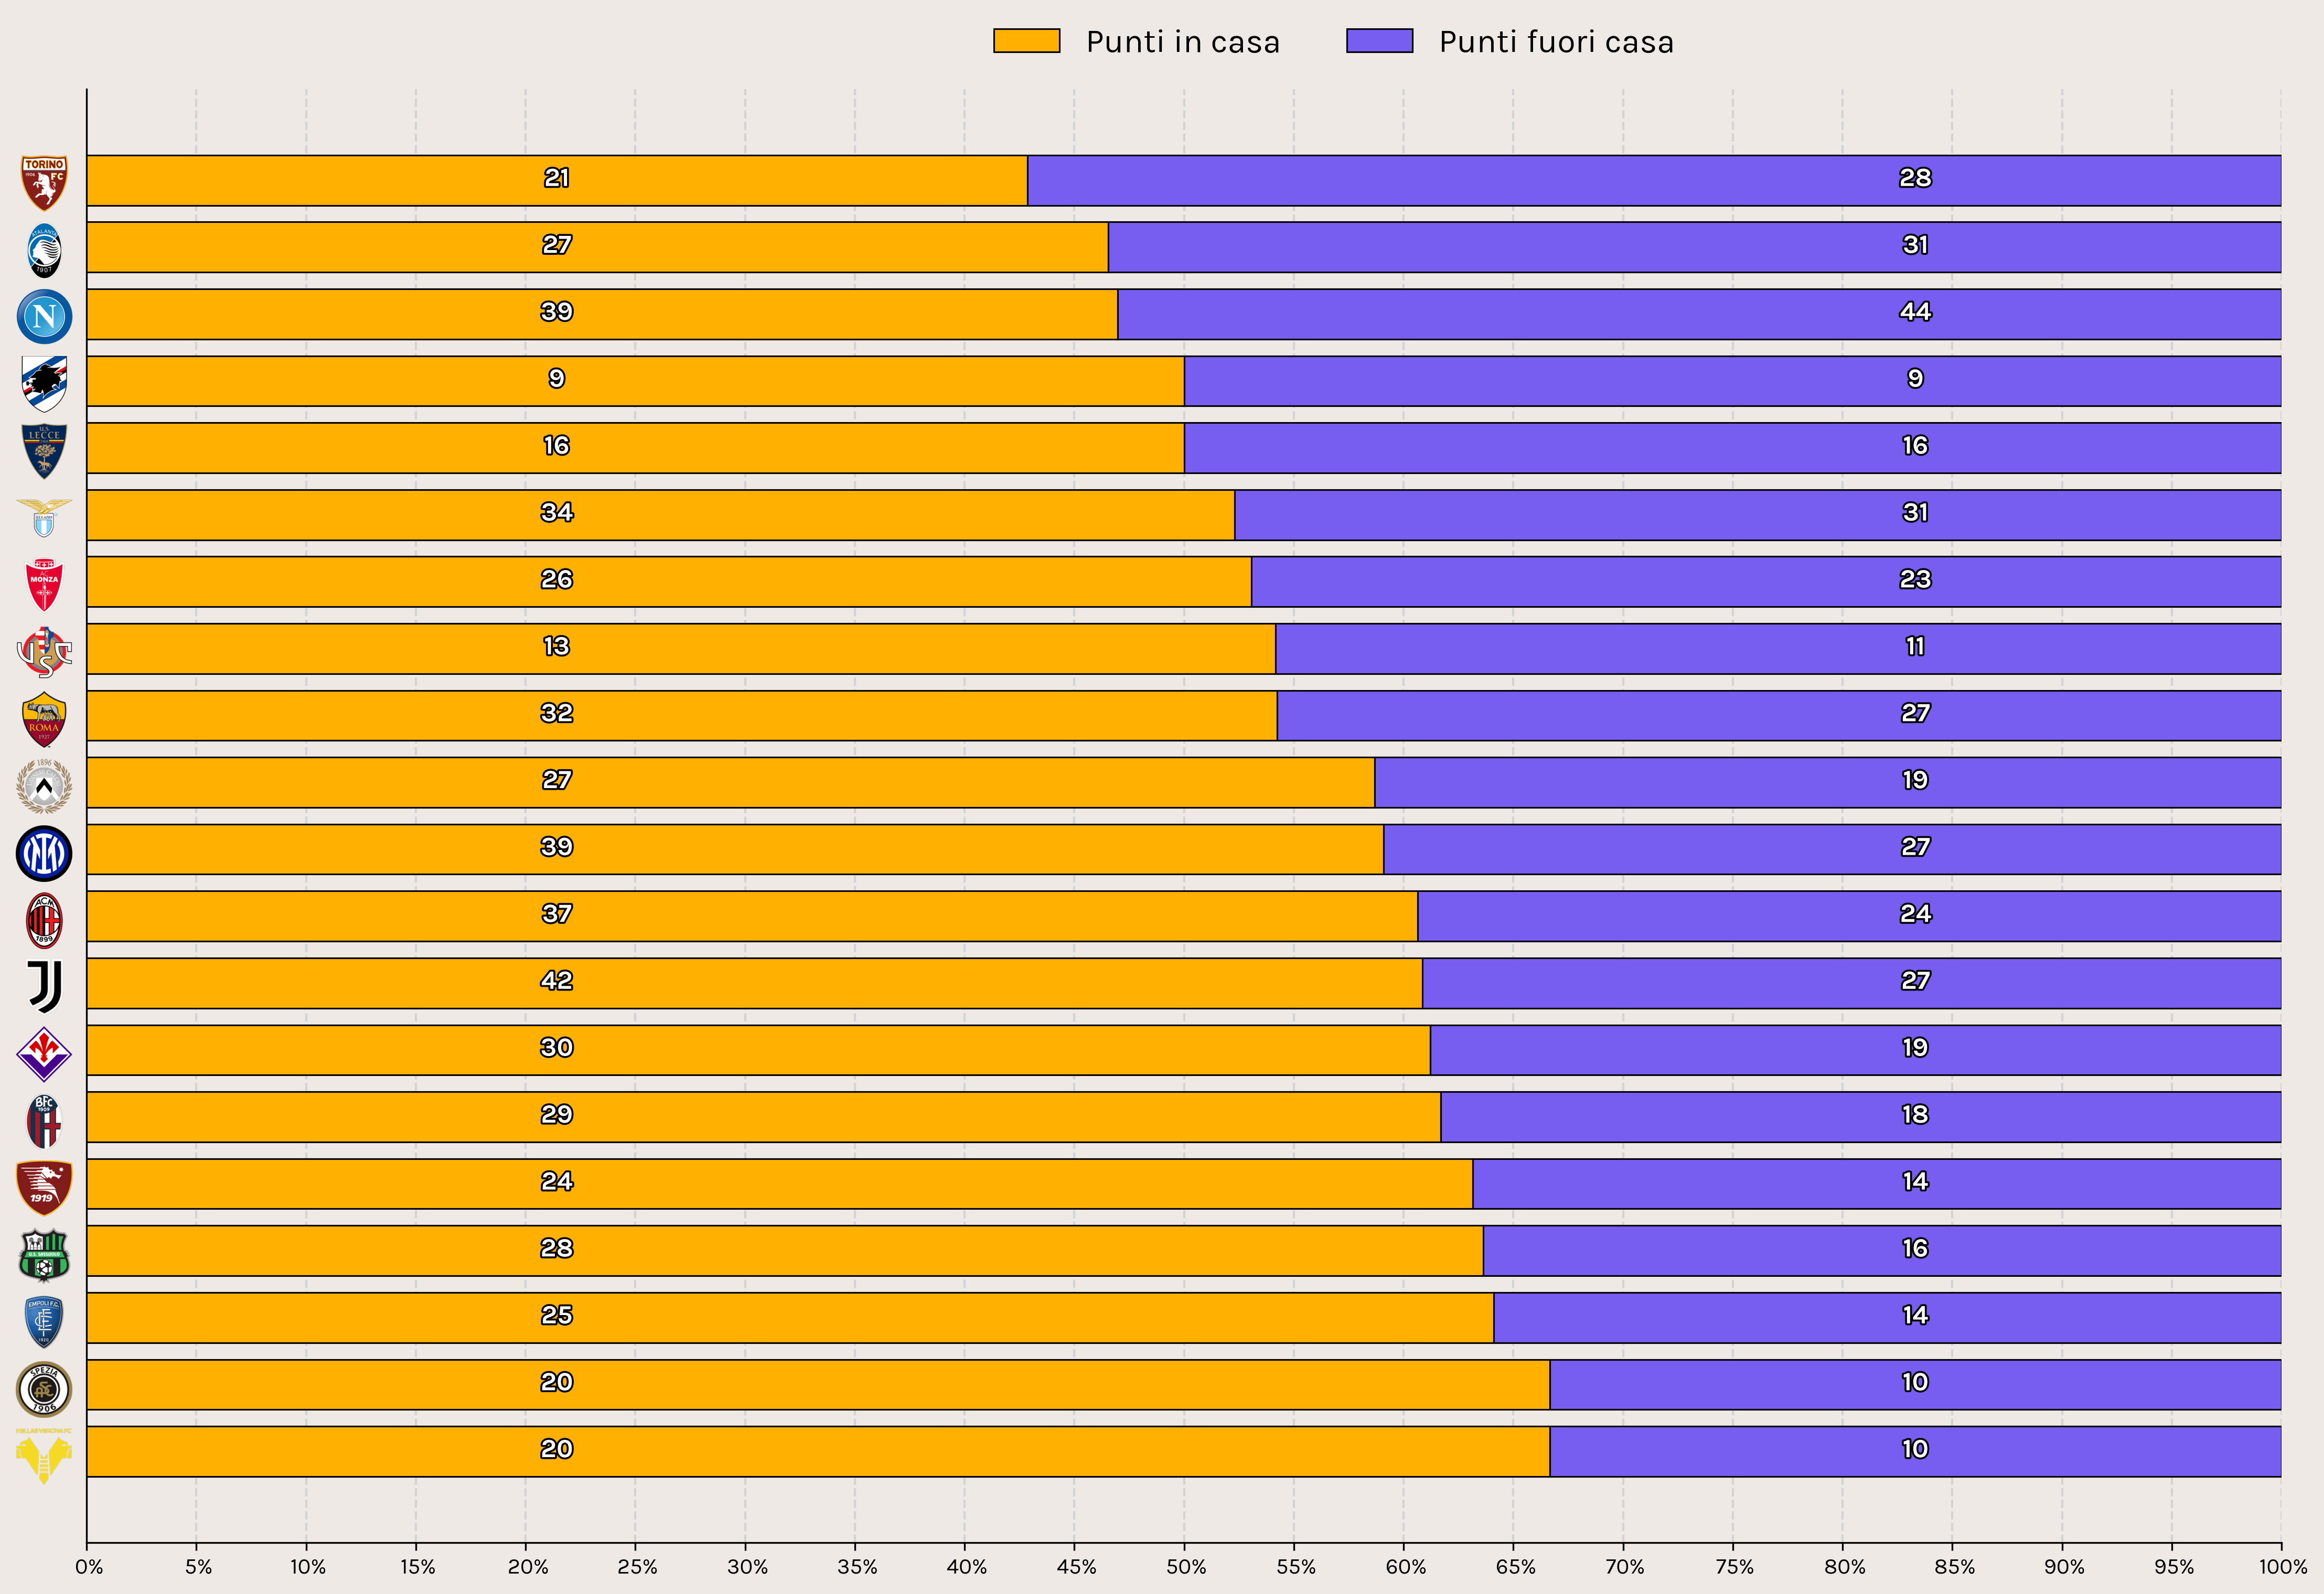

In [14]:
fig = plt.figure(figsize=(18, 12), dpi=300)
ax = plt.subplot()
plot(ax, fig, df_sum)
plt.savefig(
    "./figures/Rendimento_Casa-Fuori.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "./figures/Rendimento_Casa-Fuori_tr.png",
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)

In [61]:
def plot_emp(ax, fig, df):
    df = df.sort_values(by='Pts')
    width = 0.7
    width_bar = 0.35

    ax.barh(
        df.index, 
        df.Casa, 
        ec = "black", 
        lw = .75, 
        color = color_casa, 
        zorder = 3, 
        height = 0.75,
        label = "Punti in casa"
    )

    ax.barh(
        df.index, 
        df.Fuori, 
        left = df.Casa,
        ec = "black", 
        lw = .75, 
        color = color_fuori, 
        zorder = 3, 
        height = 0.75,
        label = "Punti fuori casa"
    )
    
    ax.legend(
        ncol = 2, 
        #loc = "center right", 
        bbox_to_anchor = (0.4, 1),
        frameon = False,
        fontsize = 15
    )
    
    # Annotate the bar charts

    c = 0
    for r in df.itertuples():
        x_h = r.Casa
        x_a = r.Fuori
        home_text = ax.annotate(
            xy = (x_h/2, c),
            text = f"{r.Casa/r.Pts: .0%}", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        away_text = ax.annotate(
            xy = (x_h+x_a - x_a/2, c),
            text = f"{r.Fuori/r.Pts: .0%}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )
        c += 1
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
    #ax.set_xlim(0, 1)
    ax.spines["top"].set(visible = False)
    #ax.xaxis.set_ticks(np.linspace(0, 1, num=21))
    #ax.xaxis.set_major_formatter(lambda x, pos: f"{x*100: .0f}%")
    yticks_ = ax.yaxis.set_ticks(
        ticks = [],
        labels = []
    )
    ax.invert_yaxis()
    # starting form .815 -> x-0.035
    
    y = 0.815
    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for i in df.index:
        logo_ax = fig.add_axes([0.1, y, 0.03, 0.03], anchor = "W")
        y = round(y -0.0355, 6)
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_map.loc[i].id:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    

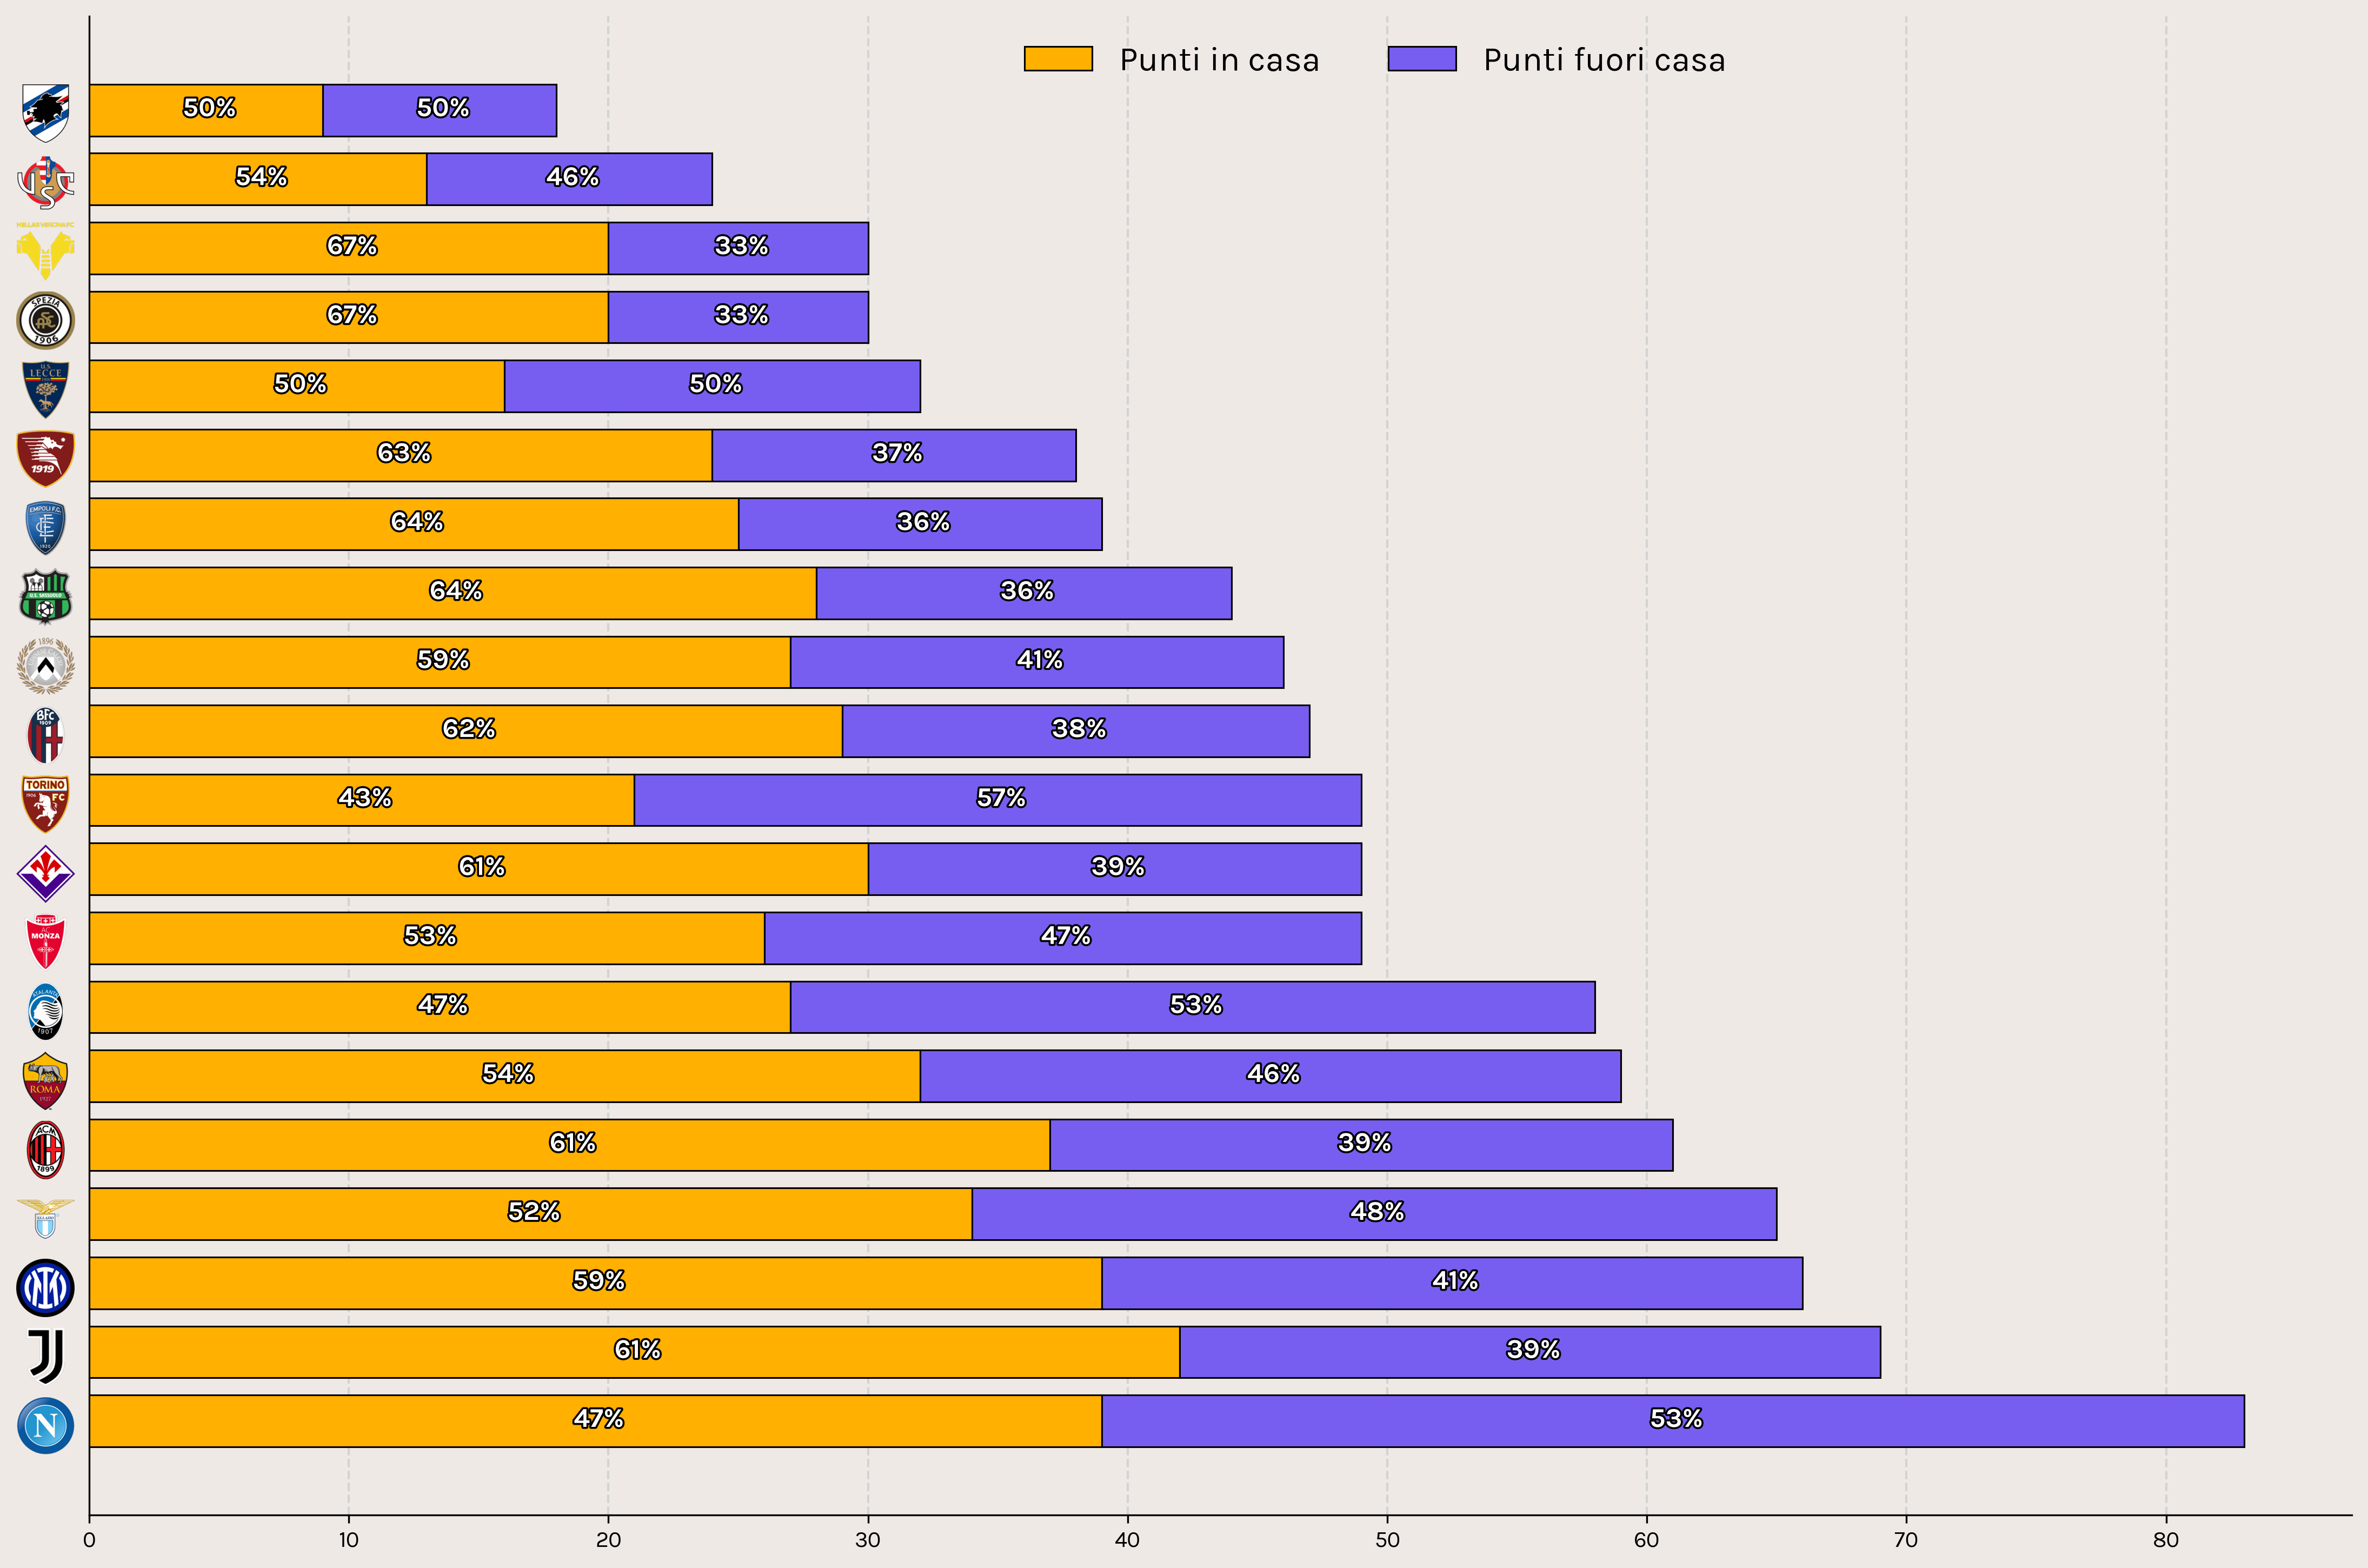

In [62]:
fig = plt.figure(figsize=(18, 12), dpi=300)
ax = plt.subplot()
p = df_sum[['Casa', 'Fuori']]
p = p.merge(p.transpose().sum().rename('Pts'), left_index=True, right_index=True)
plot_emp(ax, fig, p)
plt.savefig(
    "./figures/Rendimento_Casa-Fuori_rev.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

plt.savefig(
    "./figures/Rendimento_Casa-Fuori_tr_rev.png",
    dpi = 600,
    facecolor = "none",
    bbox_inches="tight",
    edgecolor="none",
    transparent = True
)

In [35]:
pd.DataFrame({'perc': calc_percent(df_sum).sort_values(by='Diff').index,
              'int': df_sum.sort_values(by='Diff').index})

,perc,int
0,Torino,Torino
1,Atalanta,Napoli
2,Napoli,Atalanta
3,Sampdoria,Sampdoria
4,Lecce,Lecce
5,Lazio,Cremonese
6,Monza,Lazio
7,Cremonese,Monza
8,Roma,Roma
9,Udinese,Udinese


In [53]:
p = df_sum.copy()
c = df_sum[['Casa', 'Fuori']].transpose().sum().rename('Point')
p.merge(c, left_index=True, right_index=True)

,Casa,Fuori,Diff,Point
Squad,,,,
Napoli,39,44,-5.0,83
Juventus,42,27,15.0,69
Inter,39,27,12.0,66
Lazio,34,31,3.0,65
Milan,37,24,13.0,61
Roma,32,27,5.0,59
Atalanta,27,31,-4.0,58
Fiorentina,30,19,11.0,49
Monza,26,23,3.0,49
